In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls

sample_data


In [14]:
path = "/content/drive/MyDrive/Pesquisas/Data Science/Nasa-Stars"

In [12]:
from google.colab import drive

# Data Analysis

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv(f"{path}/Stars.csv")

In [16]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


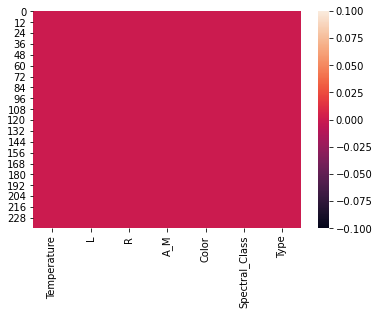

In [17]:
sns.heatmap(df.isnull());

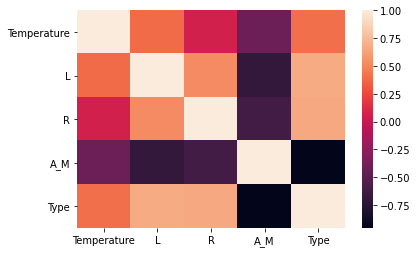

In [18]:
sns.heatmap(df.corr());

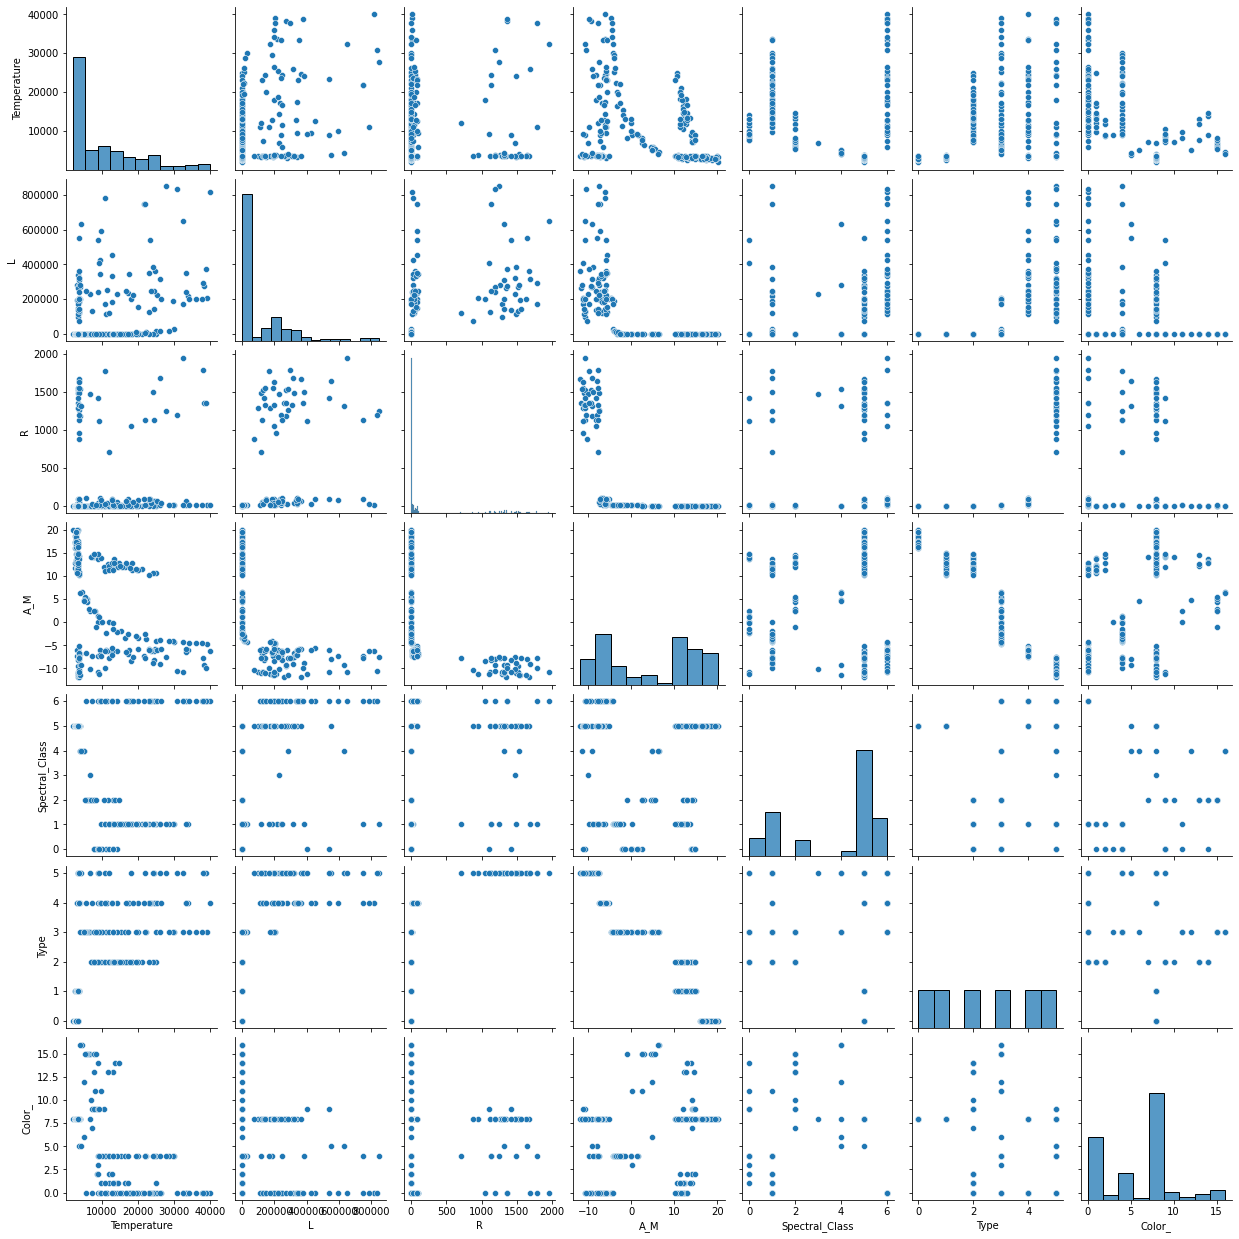

In [ ]:
sns.pairplot(df);

In [19]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [22]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
yellowish               2
Whitish                 2
Yellowish               1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
White-Yellow            1
Name: Color, dtype: int64

In [23]:
df['Color_'] = LabelEncoder().fit_transform(df['Color'])

In [24]:
df.drop('Color', axis=1, inplace=True)

In [25]:
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])

In [26]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [27]:
x = df[['Temperature', 'L', "R", "A_M", "Spectral_Class", "Color_"]]
y = df[["Type"]]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
df.shape

(240, 7)

# Machine Learning Model

In [30]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [32]:
model = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
predict_1 = model.predict(x_test)

In [34]:
model_2 = LinearRegression().fit(x_train, y_train)

In [35]:
predict_2 = model_2.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, r2_score

In [37]:
print("{:.2f}%" .format(accuracy_score(predict_1, y_test)*100))
print("{:.2f}%" .format(r2_score(predict_2, y_test)*100))

87.50%
93.15%


In [39]:
predict_1.shape

(48,)

In [40]:
predict_2.shape

(48, 1)

### Regressão Linear > 58.33%
### Regressão Logística > 94.86%

-------------------------------------------------------------------------------------------_

# Rede Neural

In [41]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [42]:
x = df[["Temperature", "L", "R", "A_M", "Spectral_Class", "Color_"]].values
y = df[["Type"]].values

In [43]:
x.shape

(240, 6)

In [44]:
df["Type"]

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [45]:
df["Type"].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [46]:
df.head()

,Temperature,L,R,A_M,Spectral_Class,Type,Color_
0,3068,0.002400,0.1700,16.12,5,0,8
1,3042,0.000500,0.1542,16.60,5,0,8
2,2600,0.000300,0.1020,18.70,5,0,8
3,2800,0.000200,0.1600,16.65,5,0,8
4,1939,0.000138,0.1030,20.06,5,0,8


In [47]:
from keras.utils import np_utils

In [48]:
x = df[["Temperature", "L", "R", "A_M", "Spectral_Class", "Color_"]].values
y = df[["Type"]].values

labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(y)
classe_dummy = np_utils.to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, classe_dummy, test_size=0.2)

In [50]:
pd.DataFrame(classe_dummy)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
235,0.0,0.0,0.0,0.0,0.0,1.0
236,0.0,0.0,0.0,0.0,0.0,1.0
237,0.0,0.0,0.0,0.0,0.0,1.0
238,0.0,0.0,0.0,0.0,0.0,1.0


### Neural Model

In [52]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [53]:
classificador = Sequential()

classificador.add(Dense(units = 7, activation = 'relu', input_dim = 6))
classificador.add(Dense(units = 7, activation = 'relu'))
classificador.add(Dense(units = 7, activation = 'relu'))
classificador.add(Dense(units = 6, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss="categorical_crossentropy",
                      metrics = ['categorical_accuracy'])

In [54]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 49        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 48        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [55]:
classificador.fit(x_train, y_train, batch_size = 10,
                  epochs = 1000, validation_data=(x_test, y_test))

Epoch 1/1000
20/20 [==============================] - 1s 25ms/step - loss: 28257.8900 - categorical_accuracy: 0.1133 - val_loss: 10685.8486 - val_categorical_accuracy: 0.1042
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 15800.9936 - categorical_accuracy: 0.0241 - val_loss: 4891.6660 - val_categorical_accuracy: 0.1042
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 7759.9079 - categorical_accuracy: 0.0811 - val_loss: 1525.0560 - val_categorical_accuracy: 0.3750
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 3916.3810 - categorical_accuracy: 0.2527 - val_loss: 998.2962 - val_categorical_accuracy: 0.3333
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 2035.8909 - categorical_accuracy: 0.2325 - val_loss: 567.1196 - val_categorical_accuracy: 0.3333
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 710.7802 - categorical_accuracy: 0.1936 - val_loss: 356.0289 - v

In [56]:
resultado = classificador.evaluate(x_test, y_test)
previsoes = classificador.predict(x_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2358 - categorical_accuracy: 0.9583


In [57]:
previsoes = (previsoes > 0.5)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
classe_teste2 = [np.argmax(t) for t in y_test]
previsoes2 = [np.argmax(t) for t in x]

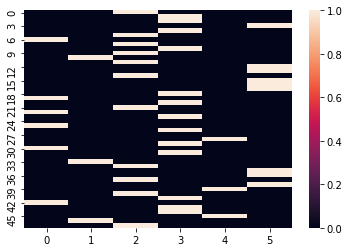

In [68]:
sns.heatmap(previsoes);

In [67]:
print("{:.2f}%" .format(r2_score(previsoes, y_test)*100))
print("{:.2f}%" .format(accuracy_score(previsoes, y_test)*100))

86.63%
91.67%
